# 데이터 EDA

In [2]:
# 필요한 sklearn import 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# train data set
loan_train = pd.read_csv('../loan_train.csv')
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Home Ownership                67463 non-null  object 
 10  Employment Duration           67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [5]:
# train data set의 컬럼 확인 
loan_train.isnull().sum().sum()

0

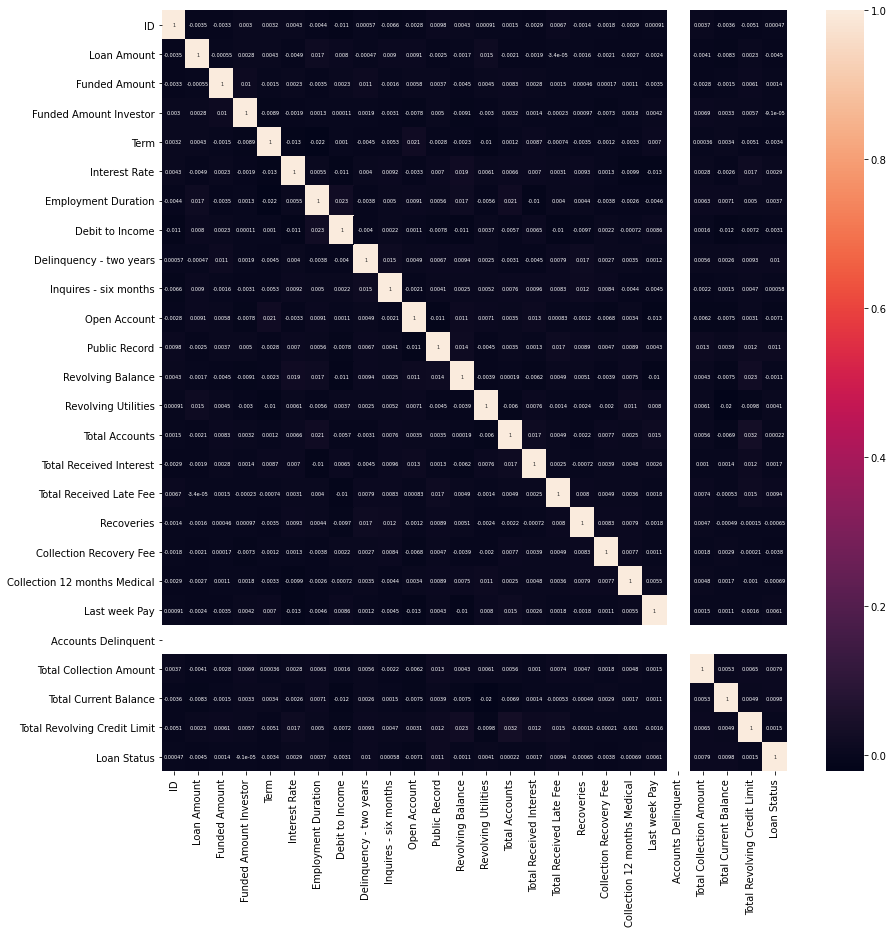

In [6]:
# 컬럼간의 상관관계 확인
plt.figure(figsize = (14, 14))
sns.heatmap(loan_train.corr(), annot = True, annot_kws={"size": 5})
plt.savefig('corr.png');

In [7]:
dup = loan_train.duplicated()
dup.sum()

0

In [8]:
pd.options.display.float_format = "{:.4f}".format
loan_train.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,...,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000,67463.0000
mean,25627607.7465,16848.9028,15770.5991,14621.7993,58.1738,11.8463,80541.5025,23.2992,0.3271,0.1458,...,1.1440,59.6916,1.1251,0.0213,71.1633,0.0000,146.4680,159573.9336,23123.0055,0.0925
std,21091554.0237,8367.8657,8150.9927,6785.3452,3.3274,3.7186,45029.1204,8.4518,0.8009,0.4733,...,5.2444,357.0263,3.4899,0.1444,43.3158,0.0000,744.3822,139033.2456,20916.7000,0.2897
min,1297933.0000,1014.0000,1014.0000,1114.5902,36.0000,5.3200,14573.5372,0.6753,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,617.0000,1000.0000,0.0000
25%,6570288.0000,10012.0000,9266.5000,9831.6850,58.0000,9.2971,51689.8433,16.7564,0.0000,0.0000,...,0.0211,1.6298,0.4763,0.0000,35.0000,0.0000,24.0000,50379.0000,8155.5000,0.0000
50%,17915646.0000,16073.0000,13042.0000,12793.6822,59.0000,11.3777,69335.8327,22.6567,0.0000,0.0000,...,0.0434,3.3445,0.7801,0.0000,68.0000,0.0000,36.0000,118369.0000,16733.0000,0.0000
75%,42715208.5000,22106.0000,21793.0000,17807.5941,59.0000,14.1935,94623.3228,30.0484,0.0000,0.0000,...,0.0719,5.4537,1.0706,0.0000,105.0000,0.0000,46.0000,228375.0000,32146.5000,0.0000
max,72245779.0000,35000.0000,34999.0000,34999.7464,59.0000,27.1823,406561.5364,39.6299,8.0000,5.0000,...,42.6189,4354.4674,166.8330,1.0000,161.0000,0.0000,16421.0000,1177412.0000,201169.0000,1.0000


In [9]:
# 종속변수에 영향을 끼치지 않는 변수 미리 제거
loan_train = loan_train.drop(['ID', "Batch Enrolled"], axis = 1)

In [10]:
# 이상치 제거 함수 
def get_outlier(df=None, column=None, weight=1.5):
    # delinquent 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    delinquent = df[df['Loan Status']==1][column]
    #print(fraud.index)
    quantile_25 = np.percentile(delinquent.values, 25)
    quantile_75 = np.percentile(delinquent.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
    outlier_index = delinquent[(delinquent < lowest_val) | (delinquent > highest_val)].index
    return outlier_index

In [11]:
# 이상치가 있는 컬럼 확인하기 
outlier = pd.DataFrame(data = {
    "int" : loan_train.dtypes == "int64", 
    "float": loan_train.dtypes == "float64"})
int_list = list(outlier[outlier.int == True].index)[:-1] # 이상치 제거에 loan Status 포함되어 있어서 제거 
float_list = list(outlier[outlier.float == True].index)
outlier_list = float_list + int_list
outlier_list

['Funded Amount Investor',
 'Interest Rate',
 'Employment Duration',
 'Debit to Income',
 'Revolving Utilities',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Loan Amount',
 'Funded Amount',
 'Term',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Total Accounts',
 'Collection 12 months Medical',
 'Last week Pay',
 'Accounts Delinquent',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit']

In [12]:
# 이상치 데이터 삭제
# 이상치 데이터 삭제 

outlier_idx_list = []
has_outliers = True

while has_outliers:
    has_outliers = False
    
    for i in float_list:
        outlier_idx_list.extend(get_outlier(loan_train, i, weight=1.5))

    for i in int_list:
        outlier_idx_list.extend(get_outlier(loan_train, i, weight=1.5))
    
    if len(outlier_idx_list) > 0:
        has_outliers = True
        loan_train.drop(outlier_idx_list, axis=0, inplace=True)
        outlier_idx_list = []
        
loan_train.drop(outlier_idx_list, axis=0, inplace=True)

In [13]:
loan_train

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.3629,59,11.1350,B,C4,MORTGAGE,176346.6267,Not Verified,...,2.4983,0.7937,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.9969,59,12.2376,C,D3,RENT,39833.9210,Source Verified,...,2.3772,0.9748,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.2245,59,12.5459,F,D4,MORTGAGE,91506.6910,Source Verified,...,4.3163,1.0201,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.1558,59,16.7312,C,C3,MORTGAGE,108286.5759,Source Verified,...,0.1070,0.7500,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.9267,59,15.0083,C,D4,MORTGAGE,44234.8254,Source Verified,...,1294.8188,0.3690,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67457,11440,17672,22965.7629,59,15.0253,C,B1,RENT,76128.7863,Verified,...,0.0611,0.3256,0,INDIVIDUAL,151,0,38,859647,21468,0
67459,8323,11046,15637.4630,59,9.9721,C,B3,RENT,65491.1282,Source Verified,...,2.0155,1.4034,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,15897,32921,12329.4577,59,19.6509,A,F3,MORTGAGE,34813.9699,Verified,...,5.6731,1.6071,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,16567,4975,21353.6846,59,13.1691,D,E3,OWN,96938.8356,Not Verified,...,1.1575,0.2076,0,INDIVIDUAL,73,0,61,361339,39075,0


## 데이터 타입이 object인 컬럼의 값 확인하기  

In [43]:
# objcet type 컬럼의 value_counts 확인


In [44]:
loan_train["Grade"].unique()

array(['B', 'C', 'F', 'A', 'G', 'E', 'D'], dtype=object)

In [45]:
loan_train["Sub Grade"].unique()

array(['C4', 'D3', 'D4', 'C3', 'G5', 'C5', 'A5', 'C2', 'B5', 'B1', 'B4',
       'B2', 'A4', 'D2', 'F3', 'C1', 'D1', 'F2', 'A2', 'A3', 'F1', 'E5',
       'B3', 'F4', 'G1', 'F5', 'E2', 'D5', 'G2', 'E4', 'A1', 'G3', 'E1',
       'E3', 'G4'], dtype=object)

In [46]:
loan_train["Home Ownership"].value_counts()

MORTGAGE    33957
RENT        22460
OWN          6431
Name: Home Ownership, dtype: int64

In [47]:
loan_train["Verification Status"].value_counts()

Source Verified    30758
Verified           16838
Not Verified       15252
Name: Verification Status, dtype: int64

In [48]:
loan_train["Payment Plan"].value_counts()

n    62848
Name: Payment Plan, dtype: int64

In [222]:
# Payment plan의 value_counts가 모두 n이므로 필요 없는 컬럼이라 drop
loan_train = loan_train.drop("Payment Plan", axis = 1)

In [26]:
loan_train["Loan Title"].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'cards',
       'Cards', 'Bathroom', 'Credit Card Loan', 'Credit Card Debt',
       'Debt Consolidation 2013', 'Debt', 'debt loan

In [228]:
# Loan Title 대소문자 중복값 합치기
loan_train["Loan Title"] = loan_train['Loan Title'].str.lower()

# Loan Title 재 분류하기
loan_title_dic = {
'mortgage loan' : ['bathroom','home','home buying','home improvement','home improvement loan','home loan','house','pool','moving and relocation'],                  
"debt":[ 'debt free','debt loan','debt reduction','debt','get debt free','get out of debt','getting ahead',
        'lending loan','loan','loan 1','loan1','refi','refinance','refinance loan'],   
"car loan": [ 'car financing','car loan',],
"credit card loan":[ 'cards','cc','cc loan','cc refi','cc refinance','cc-refinance','credit card','credit card debt',
                    'credit card loan','credit card pay off','credit card refi','credit card refinance','credit card refinance loan',
                    'credit card refinancing','credit cards','credit card paydown','credit card payoff','credit pay off','credit payoff'],   
"personal loan":[ 'wedding loan','vacation','my loan','myloan','personal','personal loan','freedom', 'major purchase'],
"business loan":["business"],
"consolidation":[ 'bill consolidation','card consolidation','cc consolidation','conso','consolidate','consolidated','consolidation','consolidation loan',
'credit card consolidation','credit consolidation','debt consolidation','debt consolidation 2013','debt consolidation loan','dept consolidation','loan consolidation',],
"credit loan":[ 'credit','credit loan',],
"payoff":[ 'bill payoff', 'debt payoff', 'pay off', 'pay off bills', 'payoff'],
"medical": ['medical', 'medical expenses', 'medical loan'],
"other":['green loan', 'other', 'relief', 'bills', 'lending club',]}

for k,v in loan_title_dic.items():
    loan_train["Loan Title"] = loan_train["Loan Title"].replace(v, k)
len(loan_train["Loan Title"].unique())

11

In [229]:
loan_train["Initial List Status"].value_counts()

w    33903
f    28944
Name: Initial List Status, dtype: int64

In [230]:
loan_train["Application Type"].value_counts()

INDIVIDUAL    62733
JOINT           114
Name: Application Type, dtype: int64

In [232]:
object_train = loan_train[["Grade", "Sub Grade", "Home Ownership","Verification Status",
 "Loan Title", "Initial List Status","Application Type"]]
object_train.columns

Index(['Grade', 'Sub Grade', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Initial List Status', 'Application Type'],
      dtype='object')

In [233]:
from sklearn.preprocessing import LabelEncoder

In [234]:
for i in object_train.columns:
    encoder = LabelEncoder()
    loan_train[i] = encoder.fit_transform(loan_train[i])
loan_train

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.3629,59,11.1350,1,13,0,176346.6267,0,...,2.4983,0.7937,0,0,49,0,31,311301,6619,0
1,3609,11940,12191.9969,59,12.2376,2,17,2,39833.9210,1,...,2.3772,0.9748,0,0,109,0,53,182610,20885,0
2,28276,9311,21603.2245,59,12.5459,5,18,0,91506.6910,1,...,4.3163,1.0201,0,0,66,0,34,89801,26155,0
3,11170,6954,17877.1558,59,16.7312,2,12,0,108286.5759,1,...,0.1070,0.7500,0,0,39,0,40,9189,60214,0
4,16890,13226,13539.9267,59,15.0083,2,18,0,44234.8254,1,...,1294.8188,0.3690,0,0,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67457,11440,17672,22965.7629,59,15.0253,2,5,2,76128.7863,2,...,0.0611,0.3256,0,0,151,0,38,859647,21468,0
67459,8323,11046,15637.4630,59,9.9721,2,7,2,65491.1282,1,...,2.0155,1.4034,0,0,14,0,37,22692,8714,0
67460,15897,32921,12329.4577,59,19.6509,0,27,0,34813.9699,2,...,5.6731,1.6071,0,0,137,0,17,176857,42330,0
67461,16567,4975,21353.6846,59,13.1691,3,22,1,96938.8356,0,...,1.1575,0.2076,0,0,73,0,61,361339,39075,0


In [235]:
loan_train.to_csv("label_loan_train.csv", index = None)

In [1]:
X = loan_train.drop("Loan Status", axis = 1)
y = loan_train["Loan Status"]
# 타겟의 비대칭 데이터 문제를 해결하기 위하여 SMOTETomek를 사용

#데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 
#단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 
#즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생할 수 있다.
y

NameError: name 'loan_train' is not defined

In [59]:
from imblearn.combine import SMOTETomek
from collections import Counter
Counter(y)

os=SMOTETomek(sampling_strategy='auto',random_state = 20 )
X_train_ns,y_train_ns=os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 61222, 1: 1625})
The number of classes after fit Counter({0: 61196, 1: 61196})


In [60]:
# 데이터 셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_ns, y_train_ns, test_size = 0.25, random_state = 20, stratify = y_train_ns)
y_train_ns.value_counts(True), y_test.value_counts(True)
len(X_train.columns)

31

# Test 데이터 예측

In [87]:
# test data set
loan_test = pd.read_csv('./data/test.csv')
loan_test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [88]:
# test data set의 Loan Status 열 컬럼 삭제
loan_test.drop("Loan Status", axis = 1, inplace = True)

In [89]:
# 필요없는 컬럼 삭제
loan_test = loan_test.drop(["ID",  "Payment Plan","Batch Enrolled"] ,axis = 1)

In [90]:
# Loan Title 대소문자 중복값 합치기
loan_test["Loan Title"] = loan_test['Loan Title'].str.lower()

# Loan Title 재 분류하기
for k,v in loan_title_dic.items():
    loan_test["Loan Title"] = loan_test["Loan Title"].replace(v, k)
len(loan_test["Loan Title"].unique())

12

In [91]:
# 테스트 데이터 셋 원핫인코딩 하기 
loan_test = pd.get_dummies(loan_test)
loan_test

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Loan Title_mortgage loan,Loan Title_other,Loan Title_payoff,Loan Title_personal loan,Loan Title_vacation,Loan Title_wedding loan,Initial List Status_f,Initial List Status_w,Application Type_INDIVIDUAL,Application Type_JOINT
0,17120,10365,16025.082690,59,12.163926,76468.82190,16.749219,1,0,12,...,1,0,0,0,0,0,1,0,1,0
1,7133,11650,12615.795600,59,6.564296,38079.01344,18.157975,0,0,11,...,0,0,0,0,0,0,0,1,1,0
2,25291,25825,11621.280830,59,14.729900,51275.93268,15.190011,0,0,22,...,0,0,0,0,0,0,1,0,1,0
3,30781,9664,15375.823510,59,10.523767,68867.98965,21.292550,0,0,11,...,0,0,0,0,0,0,0,1,1,0
4,8878,9419,7176.647582,58,9.997013,91556.85423,4.812117,0,0,11,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,35000,35000,35000.000000,60,16.240000,360000.00000,7.310000,0,0,8,...,0,0,0,0,0,0,1,0,1,0
28909,25000,25000,25000.000000,60,14.980000,105000.00000,10.220000,0,1,10,...,0,0,0,0,0,0,1,0,1,0
28910,30000,30000,29950.000000,60,18.240000,74100.00000,27.300000,0,0,19,...,0,0,0,0,0,0,1,0,1,0
28911,25000,25000,24950.000000,60,15.610000,130000.00000,27.290000,2,0,12,...,0,0,0,0,0,0,1,0,1,0


In [92]:
# 테스트 데이터 셋 스케일링
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test_scaled = scaler.fit_transform(loan_test)

In [93]:
loan_test.shape, loan_train.shape

((28913, 88), (63246, 89))

In [94]:
sub = rf_clf.predict(loan_test)
sub.sum()

0

In [127]:
answer_data = pd.read_csv("my_submission_file.csv")

In [128]:
answer_data["0"] = answer_data["0"].astype("int32")
answer_data.dtypes

0    int32
dtype: object

In [129]:
df_compare = (sub[0] == answer_data["0"])

In [130]:
df_compare.value_counts(True)

True     0.989209
False    0.010791
Name: 0, dtype: float64